In [1]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

#### тестирование гипотез
Статиситческий тест чтобы определить достаточно ли сведений из выборки чтобы сделать заключение о генеральной совокупности

Два типа: выборка vs значение; выборка vs выборка<br>
Два направления: односторонний (one tail) и двусторонний (two tail)

#### выборка vs значение; one tail
H0: Средняя продолжительность жизни в Германии 79 лет<br>
H1: Средняя продолжительность жизни в Германии более 79 лет

In [5]:
np.random.seed(105)
ages = np.random.gamma(160, 0.5, 20)

In [6]:
mean = np.mean(ages)
std = np.std(ages, ddof=1)
size = len(ages)
dof = size - 1
mean_err = std / np.sqrt(size)

In [7]:
t_stat = (mean - 79) / mean_err
print(t_stat)

1.6087525940460243


In [8]:
1 - t.cdf(t_stat, dof)

0.0620802533569379

In [11]:
t5, t95, t90 = t.ppf([0.05, 0.95, 0.9], dof)
t5, t95, t90

(-1.7291328115213678, 1.729132811521367, 1.3277282090267986)

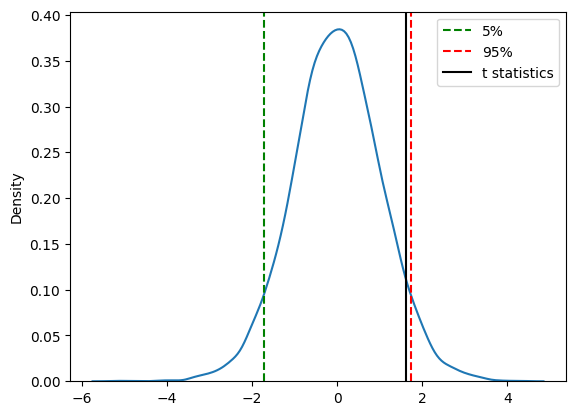

In [13]:
np.random.seed(105)
demonstration_data = np.random.standard_t(dof, 10000)
sns.kdeplot(demonstration_data)
plt.axvline(t5, linestyle='--', label='5%', color='green')
plt.axvline(t95, linestyle='--', label='95%', color='red')

# plt.axvline(t90, linestyle='--', label='90%', color='orange')

plt.axvline(t_stat, linestyle='-', label='t statistics', color='black')

plt.legend()
plt.show()

#### выборка vs выборка; one tail
H0: Средняя прибыль старых клиентов банка не отличается от новых<br>
H1: Средняя прибыль старых клиентов банка выше чем у новых

In [6]:
np.random.seed(105)
olds = np.random.normal(1000, 30, 100)
news = np.random.normal(965, 100, 100)

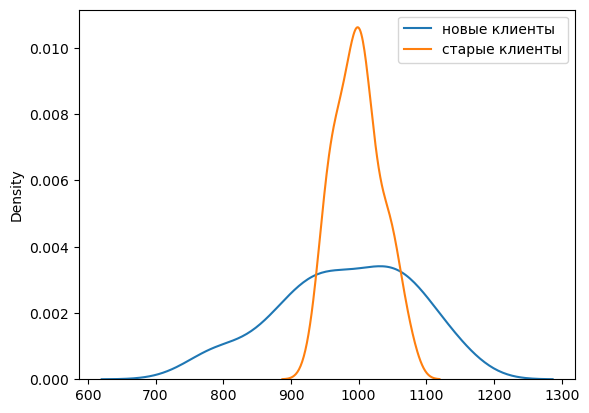

In [7]:
sns.kdeplot(news, label='новые клиенты')
sns.kdeplot(olds, label='старые клиенты')
plt.legend()
plt.show()

![Alt text](materials/T-Test-Formula.webp)

In [8]:
olds_mean = np.mean(olds)
news_mean = np.mean(news)

olds_std = np.std(olds, ddof=1)
news_std = np.std(news, ddof=1)

olds_size = len(olds)
news_size = len(news)

dof = olds_size + news_size - 2

err_diff = np.sqrt(olds_std**2/olds_size + news_std**2/news_size)
diff_mean = olds_mean - news_mean

In [9]:
t_stat = diff_mean / err_diff
t_stat

1.7169614637760227

In [10]:
1 - t.cdf(t_stat, dof)

0.04377497031103572

In [11]:
t025, t975, t95 = t.ppf([0.025, 0.975, 0.95], dof)

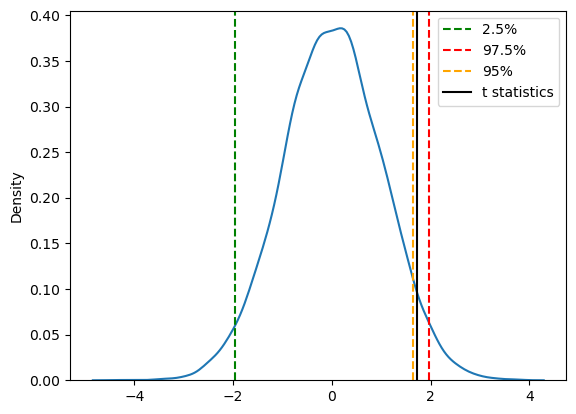

In [13]:
np.random.seed(105)
demonstration_data = np.random.standard_t(dof, 10000)
sns.kdeplot(demonstration_data)

plt.axvline(t025, linestyle='--', label='2.5%', color='green')
plt.axvline(t975, linestyle='--', label='97.5%', color='red')

plt.axvline(t95, linestyle='--', label='95%', color='orange')

plt.axvline(t_stat, linestyle='-', label='t statistics', color='black')

plt.legend()
plt.show()

#### АБ тест (упрощенный)
Посетители сайта больше сидят на нем если включить темную тему чем без нее.

Определение метрики: среднее кол-во секунд на сайте

Определение статистической значимости

Нулевая гипотеза: среднее кол-во секунд у тестовой группы не отличается от контрольной<br>
Альтернативаная гипотеза: среднее кол-во секунд у тестовой группы больше чем у контрольной

Подготовить тестовую и контрольную группы: случайное распределение

Получить замеры: время на сайте у каждого посетителя тестовой и контрольной груп

In [25]:
np.random.seed(105)
test = [i for i in np.random.normal(200, 60, 100) if i>0]
control = [i for i in np.random.normal(170, 80, 100) if i>0]

In [26]:
test_mean = np.mean(test)
control_mean = np.mean(control)

test_std = np.std(test, ddof=1)
control_std = np.std(control, ddof=1)

test_size = len(test)
control_size = len(control)

dof = test_size + control_size - 2

err_diff = np.sqrt(test_std**2/test_size + control_std**2/control_size)
diff_mean = test_mean - control_mean

In [27]:
t_stat = diff_mean / err_diff
t_stat

1.2749823880997215

In [28]:
1 - t.cdf(t_stat, dof)

0.10190855931939691

In [30]:
t025, t975, t95 = t.ppf([0.025, 0.975, 0.95], dof)

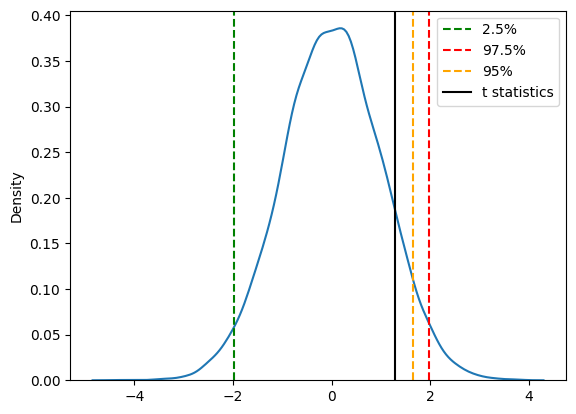

In [31]:
np.random.seed(105)
demonstration_data = np.random.standard_t(dof, 10000)
sns.kdeplot(demonstration_data)

plt.axvline(t025, linestyle='--', label='2.5%', color='green')
plt.axvline(t975, linestyle='--', label='97.5%', color='red')

plt.axvline(t95, linestyle='--', label='95%', color='orange')

plt.axvline(t_stat, linestyle='-', label='t statistics', color='black')

plt.legend()
plt.show()

#### Доп параметры АБ теста

$n = (2 * (Z_{alpha/2} + Z_{beta})^2 * sigma^2) / delta^2$ - для двустороннего теста

$n = ((Z_{\alpha} + Z_{\beta})^2 * \sigma^2) / \delta^2$ - для одностороннего теста

Где:
- n = размер выборки в каждой группе
- $Z_{\alpha/2}$ = Z-значение для заданного уровня значимости (альфа) (например, 1.96 для уровня доверия 95%)
- $Z_{\beta}$ = Z-значение для заданной мощности (1 - бета) (например, 0.84 для мощности 80%)
- sigma = оценочное стандартное отклонение генеральной совокупности
- delta = минимально обнаружимый эффект (наименьшее различие между группами, которое вы хотите обнаружить)

Мощность теста — это вероятность того, что тест покажет различия между тестовой и контрольной группами, при условии, что они действительно есть.

In [41]:
z_alp, z_bet = norm.ppf([0.025, 0.2])
z_alp, z_bet

(-1.9599639845400545, -0.8416212335729142)

In [34]:
err_diff

10.482428087261423

In [42]:
(2 * (z_alp+z_bet)**2 * err_diff ** 2) / 3 ** 2

191.65446617814717